# Лабораторная работа 3


Классификация в sklearn. Метрики классификации

Выполнил: 6132, Баканов Д.С.

*Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.*

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
classification_df = pd.read_csv("./data/classification.csv")
chicago_df = pd.read_csv("./data/Chicago_Crime_Final_Data.csv")

## Описание датасетов

### Beginner's Classification Dataset

In [3]:
classification_df.head(5)

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [5]:
classification_df.isnull().sum()

age         0
interest    0
success     0
dtype: int64

In [6]:
classification_df.nunique()

age         297
interest    297
success       2
dtype: int64

__Описание набора__


| Признак   | Описание                           | Тип      |
|-----------|------------------------------------|----------|
| age       | Возраст                            | числовой |
|  interest | Мера интереса человека в свое дело | числовой |
| success   | Успешени ли человек в этом деле    | бинарный |

### Chicago Crime with Climate Data, 2021

In [7]:
chicago_df.head(5)

,primary_type,location_description,beat,ward,Date,Hour,HubDist,PRCP,SNOW,SNWD,...,WT01,WT02,WT03,WT04,WT06,WT08,WT09,DayOfWeek,Month,Dholiday
0,ROBBERY,STREET,411,8.0,2021-01-14,6,2.501112,8.625000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
1,DECEPTIVE PRACTICE,RESIDENCE,1613,41.0,2021-01-28,12,4.484144,0.625000,0.000000,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
2,DECEPTIVE PRACTICE,RESIDENCE,1613,45.0,2021-02-01,9,2.305444,49.142857,72.500000,365.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0.0
3,DECEPTIVE PRACTICE,RESIDENCE,212,4.0,2021-02-22,12,1.503849,39.875000,12.000000,416.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,2,0.0
4,WEAPONS VIOLATION,SIDEWALK,432,10.0,2021-03-15,11,2.927048,9.125000,6.571429,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,3,0.0


In [8]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187989 entries, 0 to 187988
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   primary_type          187989 non-null  object 
 1   location_description  187989 non-null  object 
 2   beat                  187989 non-null  int64  
 3   ward                  187989 non-null  float64
 4   Date                  187989 non-null  object 
 5   Hour                  187989 non-null  int64  
 6   HubDist               187989 non-null  float64
 7   PRCP                  187989 non-null  float64
 8   SNOW                  187989 non-null  float64
 9   SNWD                  187989 non-null  float64
 10  TMAX                  187989 non-null  float64
 11  TMIN                  187989 non-null  float64
 12  WDF2                  187989 non-null  float64
 13  WSF2                  187989 non-null  float64
 14  WT01                  187989 non-null  float64
 15  

In [9]:
chicago_df.isnull().sum()

primary_type            0
location_description    0
beat                    0
ward                    0
Date                    0
Hour                    0
HubDist                 0
PRCP                    0
SNOW                    0
SNWD                    0
TMAX                    0
TMIN                    0
WDF2                    0
WSF2                    0
WT01                    0
WT02                    0
WT03                    0
WT04                    0
WT06                    0
WT08                    0
WT09                    0
DayOfWeek               0
Month                   0
Dholiday                0
dtype: int64

In [10]:
chicago_df.nunique()

primary_type                31
location_description       126
beat                       274
ward                        50
Date                       338
Hour                        12
HubDist                 100988
PRCP                       156
SNOW                        35
SNWD                        51
TMAX                       229
TMIN                       225
WDF2                        69
WSF2                        67
WT01                         2
WT02                         2
WT03                         2
WT04                         2
WT06                         2
WT08                         2
WT09                         2
DayOfWeek                    7
Month                       12
Dholiday                     2
dtype: int64

__Описание набора__

| Признак              | Описание                                                               | Тип            |
|----------------------|------------------------------------------------------------------------|----------------|
| primary_type         | Тип преступления                                                       | категориальный |
| location_description | Описание местности                                                     | категориальный |
| beat                 | Полицейский географический район, где произошел инцидент               | числовой       |
| ward                 | Район городского совета, где произошел инцидент                        | числовой       |
| Date                 | Дата, когда произошло происшествие                                     | категориальный |
| Hour                 | Час, когда произошло происшествие                                      | числовой       |
| HubDist              | Расстояние между местом происшествия и ближайшим полицейским участком  | числовой       |
| PRCP                 | Осадки                                                                 | числовой       |
| SNOW                 | Снегопад                                                               | числовой       |
| SNWD                 | Глубина снежного покрова                                               | числовой       |
| TMAX                 | Максимальная температура                                               | числовой       |
| TMIN                 | Минимальная температура                                                | числовой       |
| WDF2                 | Направление самого быстрого ветра за 2 минуты                          | числовой       |
| WSF2                 | Максимальная скорость ветра за 2 минуты                                | числовой       |
| WT01                 | Наличие тумана: холодный или морозящий                                 | бинарный       |
| WT02                 | Наличие тяжелого тумана: клубящийся или ледяной                        | бинарный       |
| WT03                 | Наличие грома                                                          | бинарный       |
| WT04                 | Наличие осадков:  дождь, мокрый снег, снежная крупа или небольшой град | бинарный       |
| WT06                 | Наличие гололеда или изморози                                          | бинарный       |
| WT08                 | Наличие дымки или дыма                                                 | бинарный       |
| WT09                 | Наличие сильного или слабого снегопада                                 | бинарный       |
| DayOfWeek            | День недели                                                            | числовой       |
| Month                | Месяц                                                                  | числовой       |
| Dholiday             | Является ли данный день официальным праздником в США                   | бинарный       |

## Выполнение заданий

### 1. Многоклассовая классификация

*1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.*

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
chicago_df_without_categorical = chicago_df.copy()
number_types = [int, float]
categorical_columns = []
for col in chicago_df.columns:
    if chicago_df[col].dtype not in number_types:
        categorical_columns.append(col)
categorical_columns

['primary_type', 'location_description', 'Date']

In [13]:
# избавляемся от категориальных переменных
primary_type_le = LabelEncoder() # для primary type воспользуемся LabelEncoder, так как это целевая переменная
primary_type_le.fit(chicago_df.primary_type)
chicago_df_without_categorical["primary_type"] = primary_type_le.transform(chicago_df["primary_type"])

In [14]:
# от location_description можно избавится, так как различных значений слишком много
chicago_df_without_categorical = chicago_df_without_categorical.drop(columns=["location_description"], axis=1)

In [15]:
# преобразуем Date в datetime
chicago_df_without_categorical["Date"] = pd.to_datetime(chicago_df["Date"])
chicago_df_without_categorical["Date"]

0        2021-01-14
1        2021-01-28
2        2021-02-01
3        2021-02-22
4        2021-03-15
            ...    
187984   2021-04-17
187985   2021-07-19
187986   2021-08-19
187987   2021-07-28
187988   2021-03-25
Name: Date, Length: 187989, dtype: datetime64[ns]

In [16]:
# создадим новые признаки DayOfMonth из datetime Date
chicago_df_without_categorical["DayOfMonth"] = chicago_df_without_categorical["Date"].dt.day

In [17]:
# избавимся от Date
chicago_df_without_categorical = chicago_df_without_categorical.drop(columns=["Date"], axis=1)

In [18]:
chicago_df_without_categorical.nunique()

primary_type        31
beat               274
ward                50
Hour                12
HubDist         100988
PRCP               156
SNOW                35
SNWD                51
TMAX               229
TMIN               225
WDF2                69
WSF2                67
WT01                 2
WT02                 2
WT03                 2
WT04                 2
WT06                 2
WT08                 2
WT09                 2
DayOfWeek            7
Month               12
Dholiday             2
DayOfMonth          31
dtype: int64

In [19]:
# разделяем набор на признаки и целевую переменную
y = chicago_df_without_categorical["primary_type"]
X = chicago_df_without_categorical.drop(columns=["primary_type"], axis=1)

# разделяем набор на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
# обучаем дерево решений
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# предсказываем для тестового набора
y_pred = decision_tree.predict(X_test)

In [21]:
# оцениваем accuracy
from sklearn.metrics import accuracy_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Accuracy: 0.16


*1.2. То же самое с использованием кросс-валидации*

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree, X, y, cv=3)
print(f"Mean score: {np.mean(scores)} ({np.std(scores)})")

Mean score: 0.1554293070339222 (0.002606003488469195)


*1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)*

<AxesSubplot:xlabel='max_depth'>

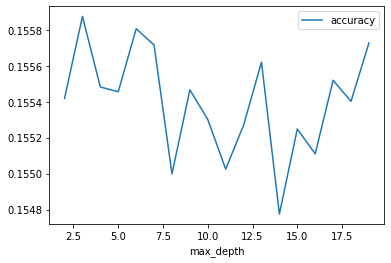

In [23]:
max_depth_list = range(2, 20)
accuracies = []
for max_depth in max_depth_list:
    dtree = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(decision_tree, X, y, cv=3)
    accuracies.append(np.mean(scores))
dtree_df = pd.DataFrame(data={"max_depth": max_depth_list, "accuracy": accuracies})
dtree_df.plot.line(x="max_depth", y="accuracy")

*1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор).*

<AxesSubplot:>

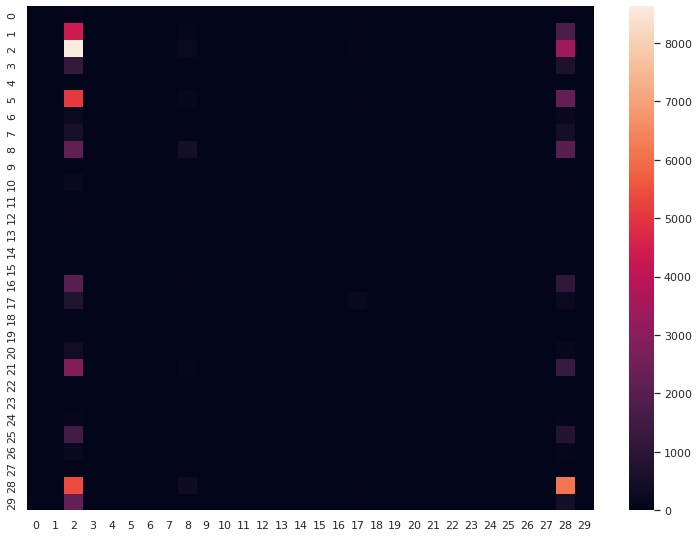

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


sns.set(rc={'figure.figsize':(12.7,9.27)}) # задаем настройки размера изображений

dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix)

### 2. Бинарная классификация.

*На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`*

In [25]:
y = classification_df.success
X = classification_df.drop(columns=["success"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9292929292929293
Precision: 0.9183673469387755
Recall: 0.9375
F1-score: 0.9278350515463918
Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        51
         1.0       0.92      0.94      0.93        48

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



### 3. Использование нормализации признаков

*В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler` или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.*

In [27]:
def print_metrics(model, features, labels) -> (float, float):
    print("=" * 100)
    accuracy_list = cross_val_score(model, features, labels, cv=5)
    print(f"Accuracy: {np.mean(accuracy_list)} ({np.std(accuracy_list)})")

    if len(np.unique(labels)) == 2:
        features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5, random_state=0)
        model.fit(features_train, labels_train)
        labels_pred = model.predict(features_test)
        print(f"Precision: {precision_score(labels_test, labels_pred)}")
        print(f"Recall: {recall_score(labels_test, labels_pred)}")
        print(f"F1-score: {f1_score(labels_test, labels_pred)}")
        print(f"Classification report:\n{classification_report(labels_test, labels_pred)}")
    print("=" * 100)


X_multi = chicago_df_without_categorical.drop(columns=["primary_type"], axis=1)
y_multi = chicago_df_without_categorical.primary_type

X_bin = classification_df.drop(columns=["success"], axis=1)
y_bin = classification_df.success

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_standard_multi = standard_scaler.fit_transform(X_multi)
X_min_max_multi = min_max_scaler.fit_transform(X_multi)

X_standard_bin = standard_scaler.fit_transform(X_bin)
X_min_max_bin = min_max_scaler.fit_transform(X_bin)

In [30]:
dtree = DecisionTreeClassifier()

print("Метрики мультиклассовой классификации без применения нормализации")
print_metrics(dtree, X_multi, y_multi)
print("Метрики мультиклассовой классификации с применением StanardScaler")
print_metrics(dtree, X_standard_multi, y_multi)
print("Метрики мультиклассовой классификации с применением MinMaxScaler")
print_metrics(dtree, X_min_max_multi, y_multi)

print("Метрики бинарной классификации без применения нормализации")
print_metrics(dtree, X_bin, y_bin)
print("Метрики бинарной классификации с применением StanardScaler")
print_metrics(dtree, X_standard_bin, y_bin)
print("Метрики бинарной классификации с применением MinMaxScaler")
print_metrics(dtree, X_min_max_bin, y_bin)

Метрики мультиклассовой классификации без применения нормализации
Accuracy: 0.15761558962281827 (0.0036010626130671165)
Метрики мультиклассовой классификации с применением StanardScaler
Accuracy: 0.1584507507571567 (0.0035038826073929765)
Метрики мультиклассовой классификации с применением MinMaxScaler
Accuracy: 0.158546501097023 (0.002906248202724652)
Метрики бинарной классификации без применения нормализации
Accuracy: 0.9292655367231639 (0.03618757633716344)
Precision: 0.9404761904761905
Recall: 0.9518072289156626
F1-score: 0.9461077844311376
Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        66
         1.0       0.94      0.95      0.95        83

    accuracy                           0.94       149
   macro avg       0.94      0.94      0.94       149
weighted avg       0.94      0.94      0.94       149

Метрики бинарной классификации с применением StanardScaler
Accuracy: 0.9224858757062148 (0.03498201